In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

# import numpy as np
# from scripts.experiments import experiment2
#
# ns = np.power(10, np.arange(0, 10))
# xis = np.linspace(0, 1, 10)
#
# experiment2(xis, ns, '_experiment2_small_tmp.csv', n_runs=100)


import scripts.visualization as viz
viz.load_matplotlib()
plt = viz.plt

In [2]:
import pandas as pd
import seaborn as sns

def next_param(a: list, idx: int):
    return float(a[idx].split('=')[-1])

def load_results(path: str):
    a = path.split("/")[-1].split('_')[2:]
    beta = next_param(a, 0)
    gamma = next_param(a, 1)
    # kappa = next_param(a, 2)
    mu = next_param(a, 3)
    delta = next_param(a, 4)
    l = next_param(a, 5)
    q = next_param(a, 6)
    p = next_param(a, 7)
    epsilon = float(a[8].split('=')[-1].split('e')[0])

    params = {r'\beta': beta, r'\gamma': gamma, r'\mu': mu,
              r'\delta': delta, r'\lambda': l, 'q': q, 'p': p,
              r'\epsilon': epsilon}
    return pd.read_csv(path, index_col=0), params

In [19]:
from math import floor, log10

def format_sci_notation(num):
    exponent = len(num) - 1
    return r'$10^{}$'.format(exponent)


def plot_experiment2(res: pd.DataFrame, params: dict, vmin=0.15, vmax=0.30, title=None):
    ax = sns.heatmap(res, vmin=vmin, vmax=vmax)
    xlabels = [r'' + format_sci_notation(s) for s in list(res.columns)]
    ax.set_xticklabels(xlabels)
    ylabels = [r'${:.2f}$'.format(s) for s in list(res.index)]
    ax.set_yticklabels(ylabels)
    for item in ax.get_yticklabels():
        item.set_rotation(0)
    for item in ax.get_xticklabels():
        item.set_rotation(0)
    if not title:
        title = []
        counter = 1
        for k, v in params.items():
            t = r'${} = {}$'.format(k, v)
            if counter % 4 == 0:
                t += '\n'
            title.append(t)
            counter += 1
        plt.title(' '.join(title))
    else:
        plt.title(title)
    plt.xlabel('$n$')
    plt.ylabel(r'$\xi$')
    
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits
    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

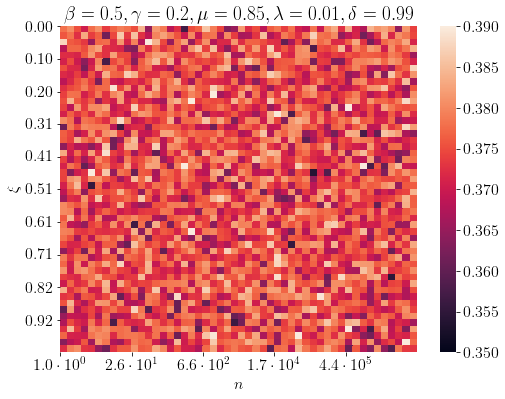

In [23]:
res, params = \
    load_results("../data/experiments/experiment2/dead_ratio_L1-beta=0.5_gamma=0.2_kappa=0.15000000000000002_mu=0.85_L2-delta=0.99_lambda=0.01_q=4_p=0.5_epsilon=0.3_experiment2_big.csv")

title=r'$\beta=0.5,\gamma=0.2,\mu=0.85, \lambda=0.01, \delta=0.99$'

ax = sns.heatmap(res, vmin=0.35, vmax=0.39)
xlabels = [sci_notation(float(s)) for s in list(res.columns)]
ax.set_xticks(list(range(50))[::10])
ax.set_xticklabels(xlabels[::10])
ylabels = [r'${:.2f}$'.format(s) for s in list(res.index)]
ax.set_yticks(list(range(50))[::5])
ax.set_yticklabels(ylabels[::5])
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
plt.xlabel('$n$')
plt.ylabel(r'$\xi$')
plt.title(title)

# plt.show()
# plt.savefig('../plots/experiment2/dead_ratio-beta=0.5_gamma=0.2_mu=0.85_lambda=0.01_delta=0.99_big.pdf')

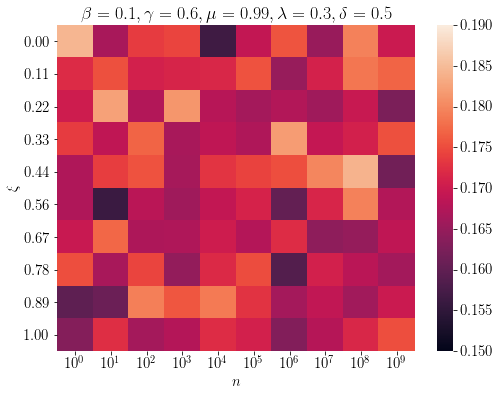

In [76]:
res, params = \
    load_results("../data/experiments/experiment2/dead_ratio_L1-beta=0.1_gamma=0.6_kappa=0.010000000000000009_mu=0.99_L2-delta=0.5_lambda=0.3_q=4_p=0.5_epsilon=0.3_experiment2_small.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.99, \lambda=0.3, \delta=0.5$'
plot_experiment2(res, params, vmin=0.15, vmax=0.19, title=title)
# plt.savefig('../plots/experiment2/dead_ratio-beta=0.1_gamma=0.6_mu=0.99_lambda=0.3_delta=0.5.pdf')

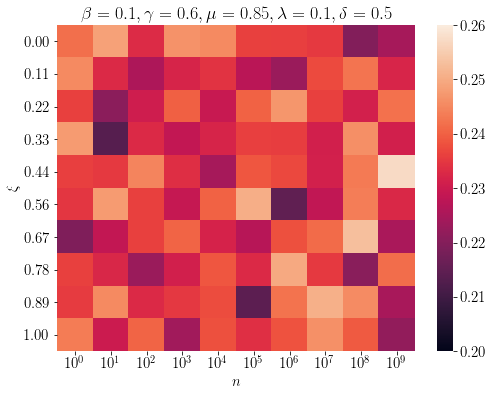

In [77]:
res, params = \
    load_results("../data/experiments/experiment2/dead_ratio_L1-beta=0.1_gamma=0.6_kappa=0.15000000000000002_mu=0.85_L2-delta=0.5_lambda=0.1_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.85, \lambda=0.1, \delta=0.5$'
plot_experiment2(res, params, vmin=0.20, vmax=0.26, title=title)
# plt.savefig('../plots/experiment2/dead_ratio-beta=0.1_gamma=0.6_mu=0.85_lambda=0.1_delta=0.5.pdf')

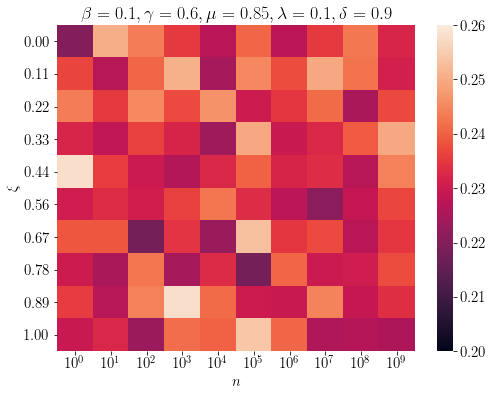

In [78]:
res, params = \
    load_results("../data/experiments/experiment2/dead_ratio_L1-beta=0.1_gamma=0.6_kappa=0.15000000000000002_mu=0.85_L2-delta=0.9_lambda=0.1_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.85, \lambda=0.1, \delta=0.9$'
plot_experiment2(res, params, vmin=0.20, vmax=0.26, title=title)
# plt.savefig('../plots/experiment2/dead_ratio-beta=0.1_gamma=0.6_mu=0.85_lambda=0.1_delta=0.9.pdf')

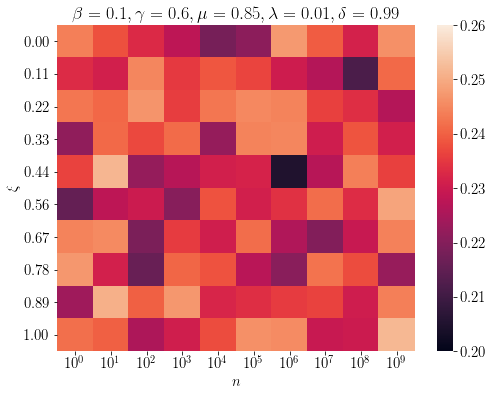

In [79]:
res, params = \
    load_results("../data/experiments/experiment2/dead_ratio_L1-beta=0.1_gamma=0.6_kappa=0.15000000000000002_mu=0.85_L2-delta=0.99_lambda=0.01_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.85, \lambda=0.01, \delta=0.99$'
plot_experiment2(res, params, vmin=0.20, vmax=0.26, title=title)
# plt.savefig('../plots/experiment2/dead_ratio-beta=0.1_gamma=0.6_mu=0.85_lambda=0.01_delta=0.99.pdf')

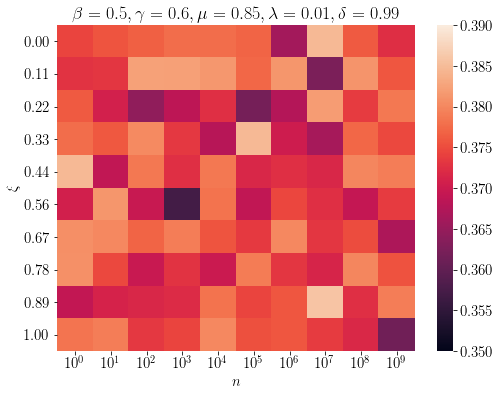

In [87]:
res, params = \
    load_results("../data/experiments/experiment2/dead_ratio_L1-beta=0.5_gamma=0.2_kappa=0.15000000000000002_mu=0.85_L2-delta=0.99_lambda=0.01_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.5,\gamma=0.6,\mu=0.85, \lambda=0.01, \delta=0.99$'
plot_experiment2(res, params, vmin=0.35, vmax=0.39, title=title)
# plt.savefig('../plots/experiment2/dead_ratio-beta=0.5_gamma=0.6_mu=0.85_lambda=0.01_delta=0.99.pdf')

### Infected ratio

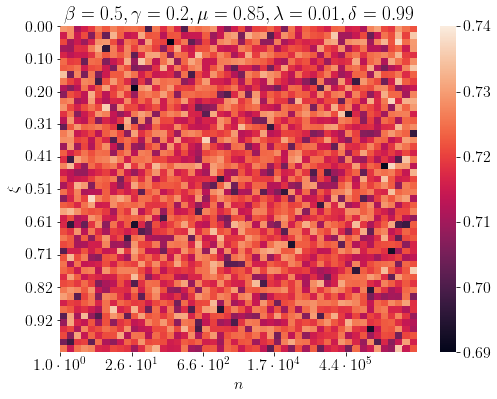

In [30]:
res, params = \
    load_results("../data/experiments/experiment2/infected_ratio_L1-beta=0.5_gamma=0.2_kappa=0.15000000000000002_mu=0.85_L2-delta=0.99_lambda=0.01_q=4_p=0.5_epsilon=0.3_experiment2_big.csv")

title=r'$\beta=0.5,\gamma=0.2,\mu=0.85, \lambda=0.01, \delta=0.99$'

ax = sns.heatmap(res, vmin=0.69, vmax=0.74)
xlabels = [sci_notation(float(s)) for s in list(res.columns)]
ax.set_xticks(list(range(50))[::10])
ax.set_xticklabels(xlabels[::10])
ylabels = [r'${:.2f}$'.format(s) for s in list(res.index)]
ax.set_yticks(list(range(50))[::5])
ax.set_yticklabels(ylabels[::5])
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
plt.xlabel('$n$')
plt.ylabel(r'$\xi$')
plt.title(title)

plt.show()
# plt.savefig('../plots/experiment2/infected_ratio-beta=0.5_gamma=0.2_mu=0.85_lambda=0.01_delta=0.99_big.pdf')

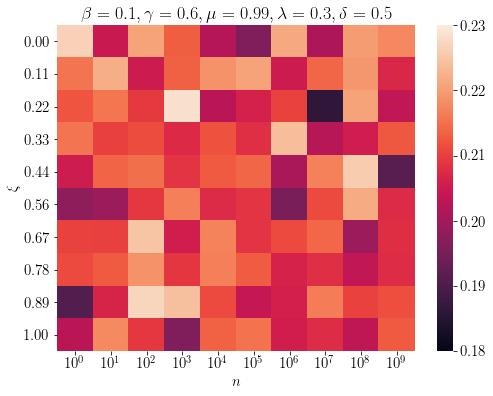

In [81]:
res, params = \
    load_results("../data/experiments/experiment2/infected_ratio_L1-beta=0.1_gamma=0.6_kappa=0.010000000000000009_mu=0.99_L2-delta=0.5_lambda=0.3_q=4_p=0.5_epsilon=0.3_experiment2_small.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.99, \lambda=0.3, \delta=0.5$'
plot_experiment2(res, params, vmin=0.18, vmax=0.23, title=title)
# plt.savefig('../plots/experiment2/infected_ratio-beta=0.1_gamma=0.6_mu=0.99_lambda=0.3_delta=0.5.pdf')

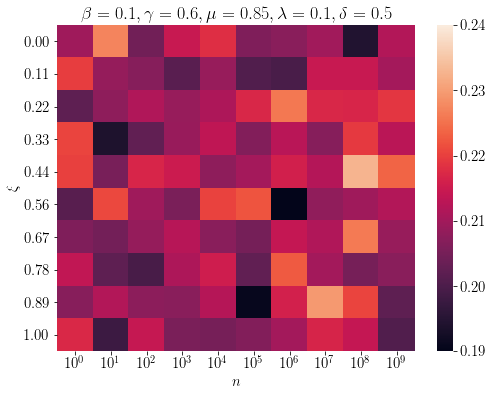

In [91]:
res, params = \
    load_results("../data/experiments/experiment2/infected_ratio_L1-beta=0.1_gamma=0.6_kappa=0.15000000000000002_mu=0.85_L2-delta=0.5_lambda=0.1_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.85, \lambda=0.1, \delta=0.5$'
plot_experiment2(res, params, vmin=0.19, vmax=0.24, title=title)
# plt.savefig('../plots/experiment2/infected_ratio-beta=0.1_gamma=0.6_mu=0.85_lambda=0.1_delta=0.5.pdf')

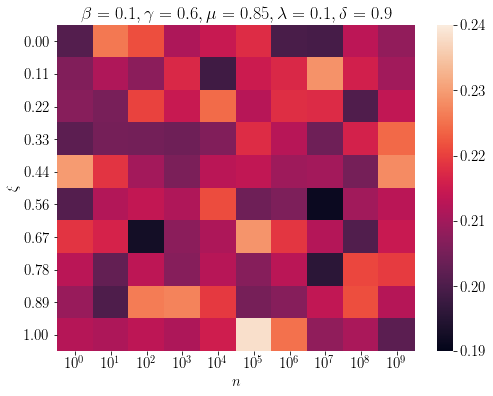

In [92]:
res, params = \
    load_results("../data/experiments/experiment2/infected_ratio_L1-beta=0.1_gamma=0.6_kappa=0.15000000000000002_mu=0.85_L2-delta=0.9_lambda=0.1_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.85, \lambda=0.1, \delta=0.9$'
plot_experiment2(res, params, vmin=0.19, vmax=0.24, title=title)
# plt.savefig('../plots/experiment2/infected_ratio-beta=0.1_gamma=0.6_mu=0.85_lambda=0.1_delta=0.9.pdf')

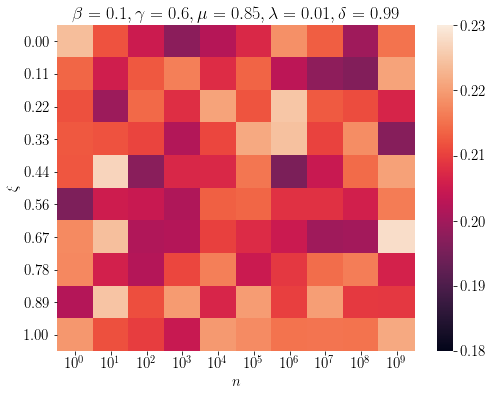

In [84]:
res, params = \
    load_results("../data/experiments/experiment2/infected_ratio_L1-beta=0.1_gamma=0.6_kappa=0.15000000000000002_mu=0.85_L2-delta=0.99_lambda=0.01_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.1,\gamma=0.6,\mu=0.85, \lambda=0.01, \delta=0.99$'
plot_experiment2(res, params, vmin=0.18, vmax=0.23, title=title)
# plt.savefig('../plots/experiment2/infected_ratio-beta=0.1_gamma=0.6_mu=0.85_lambda=0.01_delta=0.99.pdf')

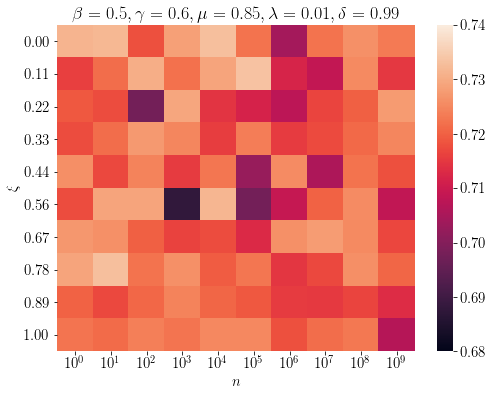

In [86]:
res, params = \
    load_results("../data/experiments/experiment2/infected_ratio_L1-beta=0.5_gamma=0.2_kappa=0.15000000000000002_mu=0.85_L2-delta=0.99_lambda=0.01_q=4_p=0.5_epsilon=0.3_experiment2_small_tmp.csv")

title=r'$\beta=0.5,\gamma=0.6,\mu=0.85, \lambda=0.01, \delta=0.99$'
plot_experiment2(res, params, vmin=0.68, vmax=0.74, title=title)
plt.savefig('../plots/experiment2/infected_ratio-beta=0.5_gamma=0.6_mu=0.85_lambda=0.01_delta=0.99.pdf')